In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.models import vit_b_16, ViT_B_16_Weights
from torchvision.transforms.functional import to_pil_image

from src.vit_recipro_cam import ViTReciproCam
from util.util import overlay_heatmap

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Test with: {device}")

model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1).to(device)

Test with: cpu


Recipro CAM Execution Time:  5.426589012145996  :  340


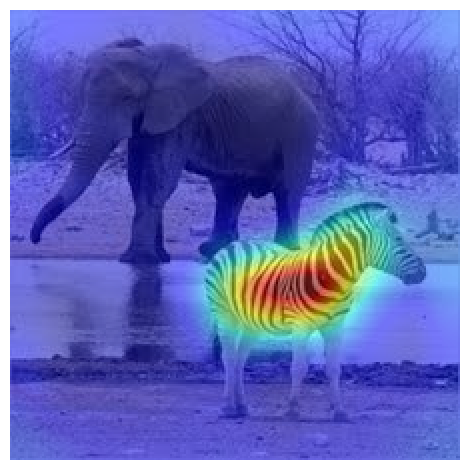

In [2]:
input_file_name = './data/el2.png'

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize,
])

img = Image.open(input_file_name)
input_tensor = transform(img).to(device)
img = np.asarray(img)

begin_time = time.time()
# Instantiate ViTReciproCam
vit_reciprocam = ViTReciproCam(model, device)
# Get CAM and index
cam, class_id = vit_reciprocam(input_tensor.unsqueeze(0))
last_time = time.time()
print('Recipro CAM Execution Time: ', last_time - begin_time, ' : ', class_id)
result = overlay_heatmap(to_pil_image(img), to_pil_image(cam.detach(), mode='F'), alpha=0.5)
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()
